# Prediccion de Gastos Medicos por Paciente usando Regresion Lineal


### <font color=#4fa4ff>__Importando Librerias__</font>

In [1808]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from regressors import stats

### <font color=#4fa4ff>__Lectura del Archivo__</font>

In [1809]:
df = pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### <font color=#4fa4ff>__Analisis de Datos__</font>

#### Visualizacion de las Dimensiones de los Datos y de la Distribucion de la Variable a predecir

Forma de la variable:  (1338, 7)


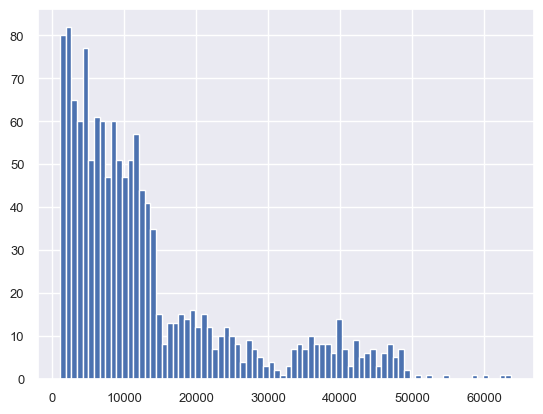

In [1810]:
print("Forma de la variable: ",df.shape)
df.charges.hist(bins = 80)
None

#### Deteccion y Eliminacion de Outliers

In [1811]:
print(df[df.charges>50000],'\n')
df = df[df.charges<50000]
print(df[df.charges>50000],'\n')

      age     sex     bmi  children smoker     region      charges
34     28    male  36.400         1    yes  southwest  51194.55914
543    54  female  47.410         0    yes  southeast  63770.42801
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209
1146   60    male  32.800         0    yes  southwest  52590.82939
1230   52    male  34.485         3    yes  northwest  60021.39897
1300   45    male  30.360         0    yes  southeast  62592.87309 

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: [] 



#### Visualizacion de las Correlaciones

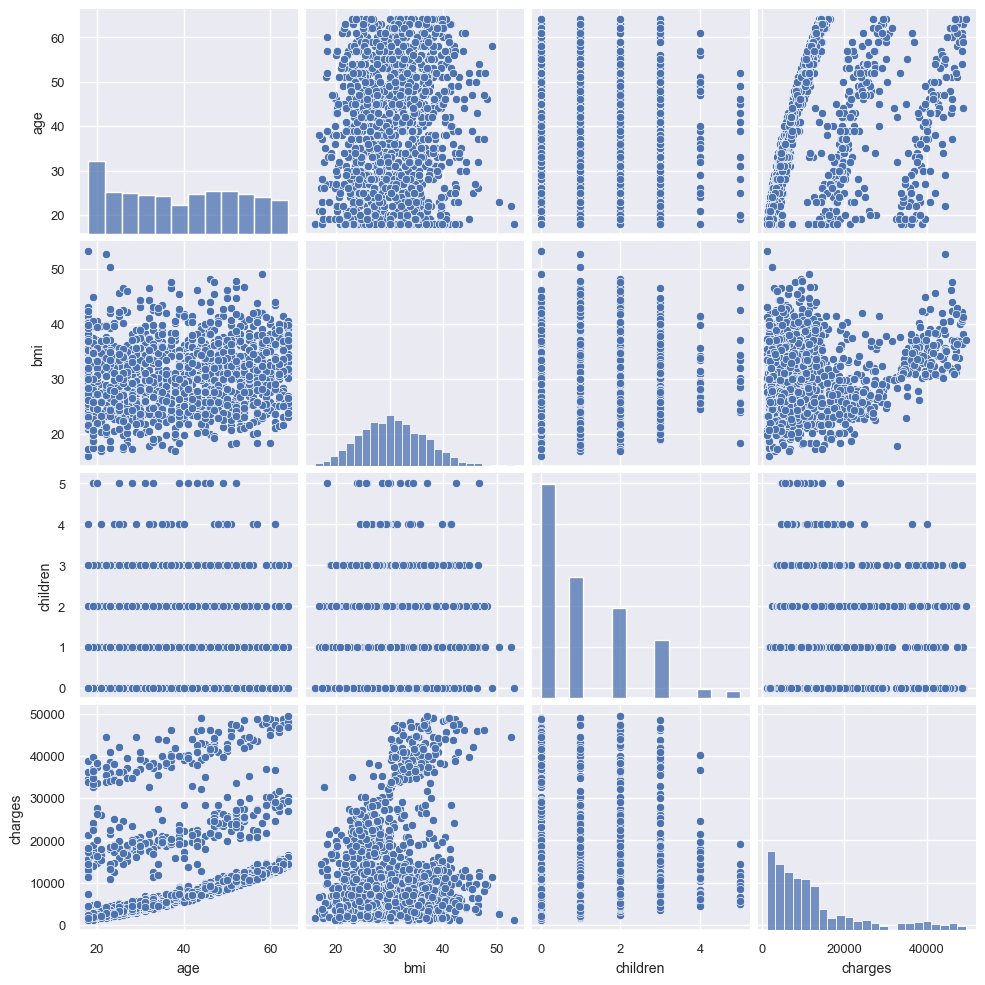

In [1812]:
cols = ['age','bmi','children','charges']
sns.pairplot(df, height=2.5)

<AxesSubplot: >

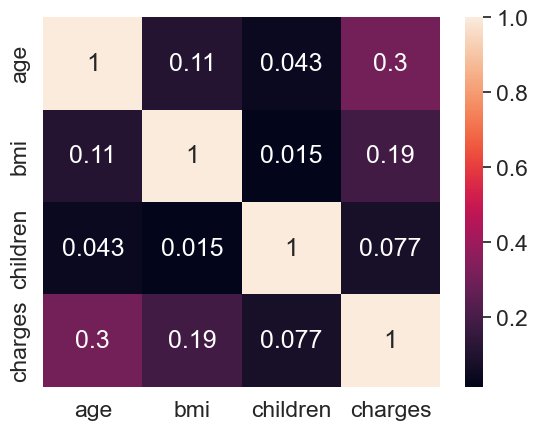

In [1813]:
sns.set(font_scale = 1.5)
sns.heatmap(df[cols].corr() , cbar=True , annot=True , yticklabels=cols, xticklabels= cols)

#### Conversion de Variables Categoricas a Numericas

In [1814]:
df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first= True)

In [1815]:
df = pd.concat([df.iloc[:,:3],df.iloc[:,4:],df.iloc[:,3]],axis=1)
df

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0,10600.54830
1334,18,31.920,0,0,0,0,0,0,2205.98080
1335,18,36.850,0,0,0,0,1,0,1629.83350
1336,21,25.800,0,0,0,0,0,1,2007.94500


#### Revisualizacion de los datos

<AxesSubplot: >

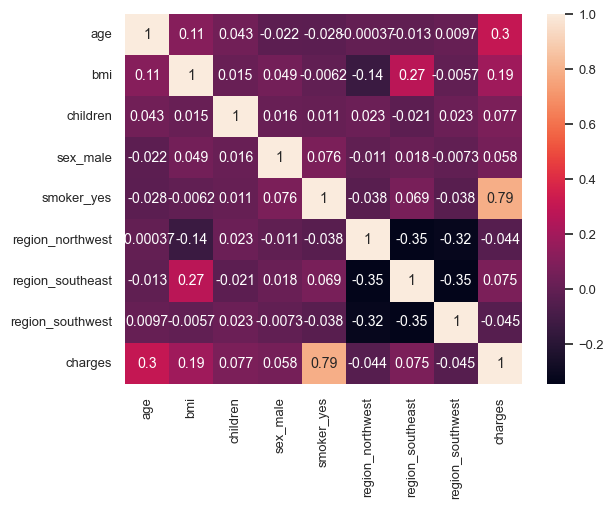

In [1816]:
sns.set(font_scale = 0.85)
sns.heatmap(df.corr() , cbar=True , annot=True , yticklabels=df.columns, xticklabels= df.columns)

### <font color=#4fa4ff>__Entrenamiento del Modelo__</font>

#### Definimos las columnas a utilizar

In [1817]:
X_cols = list(set(df.columns)-set(['charges']))
print('Lista de Features: ', X_cols)
y_col = ['charges']
print('Variable Target: ', y_col)

Lista de Features:  ['smoker_yes', 'region_southeast', 'age', 'children', 'region_southwest', 'sex_male', 'bmi', 'region_northwest']
Variable Target:  ['charges']


#### Definimos las variables para el entrenamiento

In [1818]:
X = df[X_cols].values
y = df[y_col].values
print('Dimensiones de X: ', X.shape)
print('Dimensiones de y: ', y.shape)


Dimensiones de X:  (1331, 8)
Dimensiones de y:  (1331, 1)


#### Dividimos en datos de Prueba y de Testeo

In [1819]:
X_train , X_test , y_train , y_test = train_test_split(X,y)
print('Dimensiones de X_train: ', X_train.shape)
print('Dimensiones de X_test: ', X_test.shape)
print('Dimensiones de y_train: ', y_train.shape)
print('Dimensiones de y_test: ', y_test.shape)

Dimensiones de X_train:  (998, 8)
Dimensiones de X_test:  (333, 8)
Dimensiones de y_train:  (998, 1)
Dimensiones de y_test:  (333, 1)


#### Estandarizacion de los Datos

In [1820]:
sc_X = StandardScaler().fit(X)#### Estandarizacion de los Datos
sc_y = StandardScaler().fit(y)

X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)


#### Creacion del Modelo

In [1821]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [1822]:
y_pred.shape

(333, 1)

### <font color=#4fa4ff>__Evaluando el Modelo__</font>

In [1843]:
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
print('Error Cuadrado Medio: ', MSE.round(4))
print('Coeficiente de Determinacion: ', R2.round(4))


Error Cuadrado Medio:  0.0985
Coeficiente de Determinacion:  0.916


In [1824]:
from regressors import stats

In [1825]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [1826]:
y_test = y_test.reshape(-1)

In [1827]:
print("============Summary============")
stats.summary(model , X_test , y_test, X_cols)

============Summary============
Residuals:
   Min      1Q  Median     3Q    Max
-2.058 -0.0821  0.1077 0.2667 0.9019


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.004769    0.026307   0.1813  0.856265
smoker_yes        0.785997    0.028565  27.5162  0.000000
region_southeast -0.033141    0.032727  -1.0126  0.311965
age               0.305145    0.026671  11.4410  0.000000
children          0.054706    0.026022   2.1023  0.036278
region_southwest -0.021512    0.030456  -0.7063  0.480495
sex_male         -0.002597    0.026359  -0.0985  0.921589
bmi               0.183393    0.027240   6.7324  0.000000
region_northwest -0.006140    0.030000  -0.2047  0.837965
---
R-squared:  0.75614,    Adjusted R-squared:  0.75012
F-statistic: 125.58 on 8 features


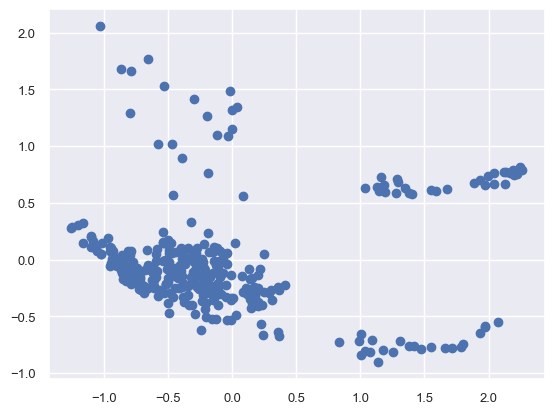

In [1828]:
residuals = np.subtract(y_test,y_pred.reshape(-1))
plt.scatter(y_pred,residuals)
plt.show()

### <font color=#4fa4ff>__Segundo Modelo__</font>

#### Redefinimos el DataFrame para trabajar mas comodos

In [1829]:
df2 = df.copy()
age2 = df2.age**2
sobrepeso = (df2.bmi >= 30).astype(int)
sobrepeso_fumador = sobrepeso*df2.smoker_yes
children_t = df2.children
c = np.array(children_t)
c = c.reshape(-1,1)
lt = np.sqrt(c*2)
c2 = c.dot(lt.T)
c2 = c2[:,1]
df2.insert(loc=1, column='age2', value=age2)
df2.insert(loc=3, column='sobrepeso', value=sobrepeso)
df2.insert(loc=5, column='sobrepeso_fumador', value=sobrepeso_fumador)
df2.insert(loc=5, column='children_t', value=c2)
df = df2
df

,age,age2,bmi,sobrepeso,children,children_t,sobrepeso_fumador,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,361,27.900,0,0,0.000000,0,0,1,0,0,1,16884.92400
1,18,324,33.770,1,1,1.414214,0,1,0,0,1,0,1725.55230
2,28,784,33.000,1,3,4.242641,0,1,0,0,1,0,4449.46200
3,33,1089,22.705,0,0,0.000000,0,1,0,1,0,0,21984.47061
4,32,1024,28.880,0,0,0.000000,0,1,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,2500,30.970,1,3,4.242641,0,1,0,1,0,0,10600.54830
1334,18,324,31.920,1,0,0.000000,0,0,0,0,0,0,2205.98080
1335,18,324,36.850,1,0,0.000000,0,0,0,0,1,0,1629.83350
1336,21,441,25.800,0,0,0.000000,0,0,0,0,0,1,2007.94500


#### Visualizamos nuevamente la Matriz de Correlacion

#### Definimos las columnas a utilizar

In [1830]:
X_cols = ['smoker_yes','children_t','age2','sobrepeso_fumador']
print('Lista de Features: ', X_cols)
y_col = ['charges']
print('Variable Target: ', y_col)

Lista de Features:  ['smoker_yes', 'children_t', 'age2', 'sobrepeso_fumador']
Variable Target:  ['charges']


#### Definimos las variables para el entrenamiento

In [1831]:
X = df[X_cols].values
y = df[y_col].values
print('Dimensiones de X: ', X.shape)
print('Dimensiones de y: ', y.shape)


Dimensiones de X:  (1331, 4)
Dimensiones de y:  (1331, 1)


#### Dividimos en datos de Prueba y de Testeo

In [1832]:
X_train , X_test , y_train , y_test = train_test_split(X,y)
print('Dimensiones de X_train: ', X_train.shape)
print('Dimensiones de X_test: ', X_test.shape)
print('Dimensiones de y_train: ', y_train.shape)
print('Dimensiones de y_test: ', y_test.shape)

Dimensiones de X_train:  (998, 4)
Dimensiones de X_test:  (333, 4)
Dimensiones de y_train:  (998, 1)
Dimensiones de y_test:  (333, 1)


#### Estandarizacion de los Datos

In [1833]:
sc_X = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

#### Creacion del Modelo

In [1834]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred.shape

(333, 1)

### <font color=#4fa4ff>__Evaluando el Segundo Modelo__</font>

In [1842]:
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
print('Error Cuadrado Medio: ', MSE.round(4))
print('Coeficiente de Determinacion: ', R2.round(4))


Error Cuadrado Medio:  0.0985
Coeficiente de Determinacion:  0.916


In [1836]:
from regressors import stats

In [1837]:
#model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [1838]:
y_test = y_test.reshape(-1)

In [1839]:
print("============Summary============")
stats.summary(model , X_test , y_test, X_cols)

============Summary============
Residuals:
    Min     1Q  Median     3Q    Max
-1.6974 0.0609  0.1123 0.1381 0.3064


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.017362   0.0000  1.000000
smoker_yes         0.461152    0.019973  23.0888  0.000000
children_t         0.066747    0.016467   4.0533  0.000063
age2               0.312414    0.017140  18.2270  0.000000
sobrepeso_fumador  0.487207    0.019016  25.6213  0.000000
---
R-squared:  0.91603,    Adjusted R-squared:  0.91500
F-statistic: 894.52 on 4 features


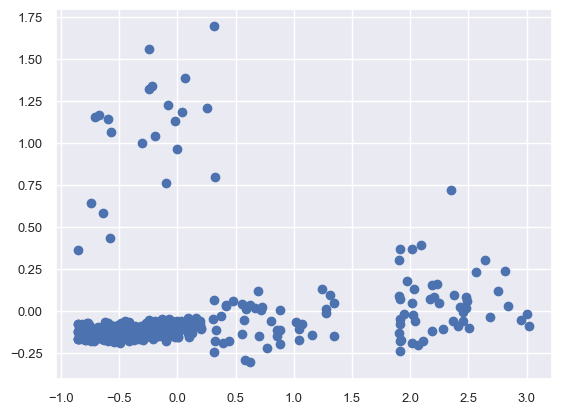

In [1841]:
residuals = np.subtract(y_test,y_pred.reshape(-1))
plt.scatter(y_pred,residuals)
plt.show()